# DSP LAB 7: Short-Time Fourier Transform

## Equalizers and Spectrographs

This week the goal is to familiarize yourself with audio spectrographs and how
they can be generated.

Compared to a regular frequency domain conversion, a
spectrograph retains its time axis, making the data 2D.

In the first portion you will read in your own microphone input but as short samples, this will later be
used to generate the columns(or time axis) of your spectrograph.

### Useful functions in Python

##matplotlib.pyplot useful functions##

plt.pause(DELAY)     #Can be used instead of plt.show() If you want to continuously update your plot in a loop

plt.clf () # Clears all lines from the current plot, but keeps the plot itself


##functions for plotting a heatmap using matplotlib.pyplot##

X,Y = np.meshgrid (X_AXIS_LABELS, Y_AXIS_LABELS) #Create axis for pcolormesh

plt.pcolormesh(X,Y,DATA) #Plot 2D data with separate axis labels


##alternative function for heatmap using OpenCV##

cv2.imshow (””, cv2.resize(DATA / (2∗∗24), (X_SCALE, Y_SCALE))) # (2∗∗24) is for plotting 32 bit values #{32−8=24}

cv2.waitKey (0) # Wait until window is closed

cv2.destroyAllWindows () # detach and destroy image window

In [10]:
# ##matplotlib.pyplot useful functions##

# plt.pause(DELAY)     #Can be used instead of plt.show() If you want to continuously update your plot in a loop

# plt.clf () # Clears all lines from the current plot, but keeps the plot itself


# ##functions for plotting a heatmap using matplotlib.pyplot##

# X,Y = np.meshgrid (X_AXIS_LABELS, Y_AXIS_LABELS) #Create axis for pcolormesh

# plt.pcolormesh(X,Y,DATA) #Plot 2D data with separate axis labels


# ##alternative function for heatmap using OpenCV##

# cv2.imshow ("", cv2.resize(DATA / (2∗∗24), (X_SCALE, Y_SCALE))) # (2∗∗24) is for plotting 32 bit values #{32−8=24}

# cv2.waitKey (0) # Wait until window is closed

# cv2.destroyAllWindows () # detach and destroy image window

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sounddevice as sd
from IPython.display import clear_output

In [12]:
recordings_nr = 10

duration = 10
fs = 44100 #sampling rate

for i in range(10):
    raw = sd.rec(int(duration*fs/recordings_nr),samplerate = fs, channels = 1, dtype = "int32") #channel1 looks liek [[channel1]] while 
    #usually it looks like [[ch1][ch2]...]
    time_dom = raw[:,0]
    sd.wait()

    plt.clf()#clears the old plot
    #plt.plot(time_dom)
    #plt.ylim([-1e10,1e10])
    plt.pause(0.001) #works correctly in real code (not ipynb)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

C:\Users\Nikita\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


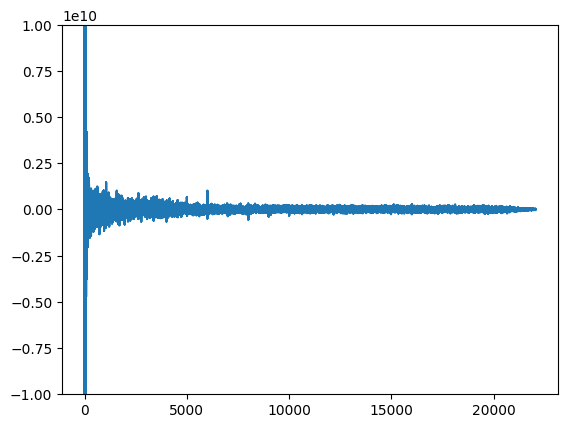

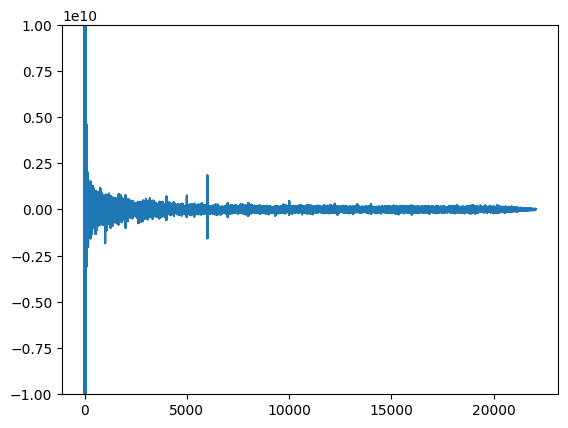

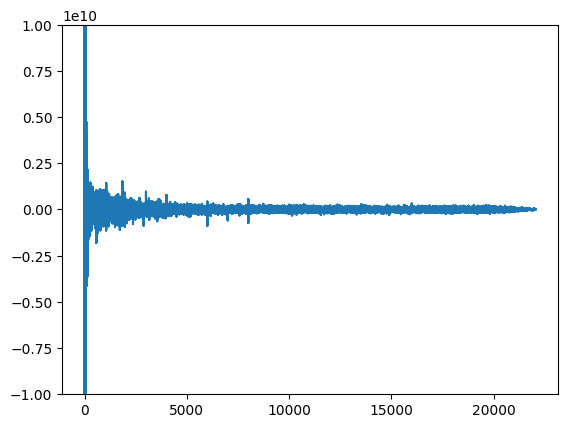

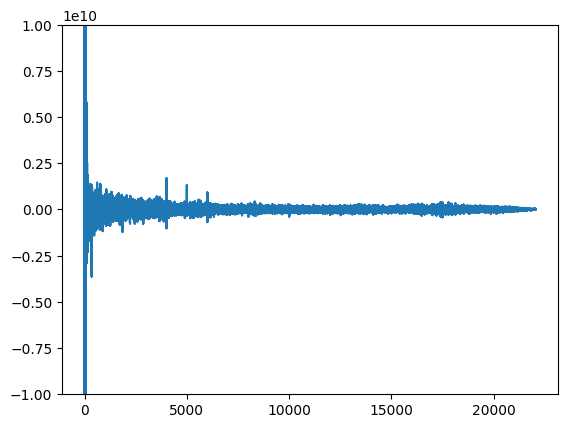

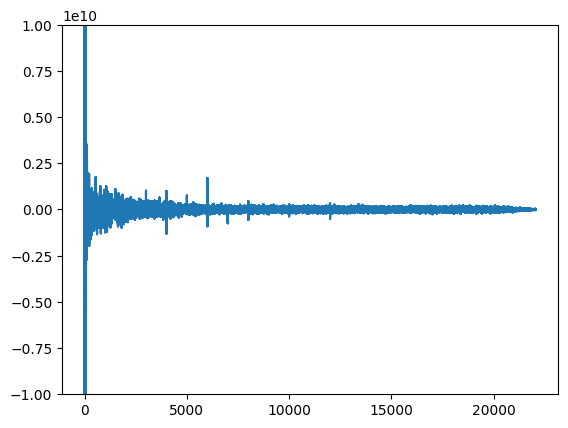

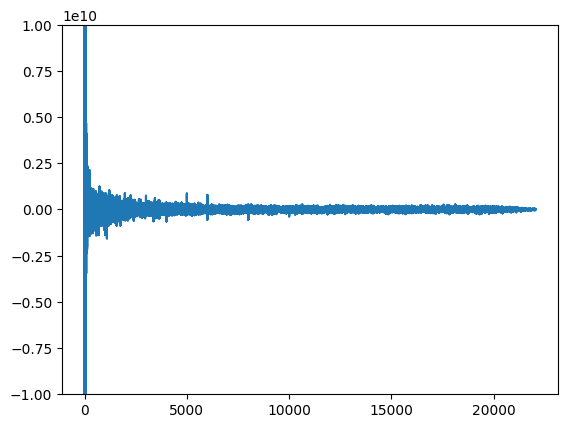

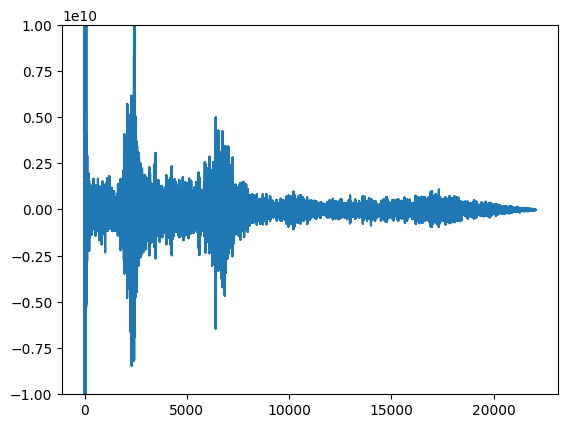

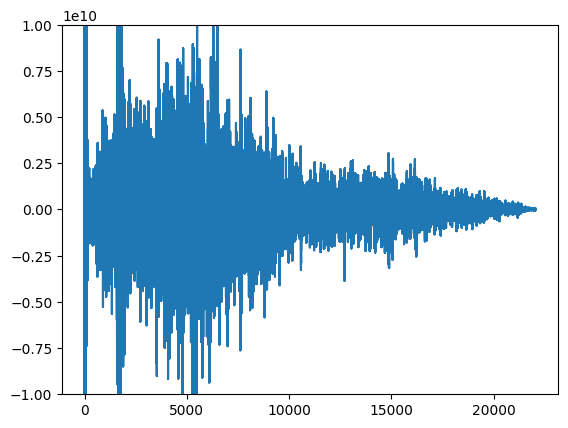

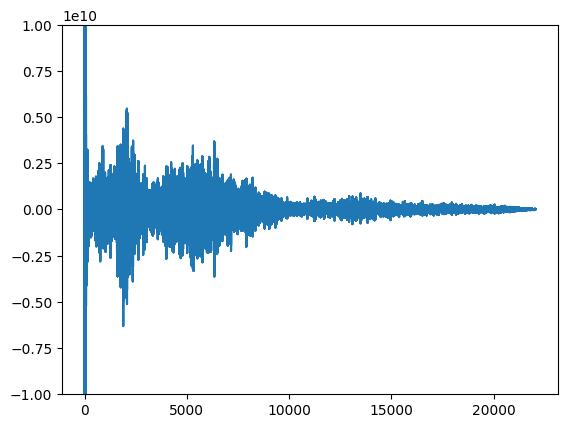

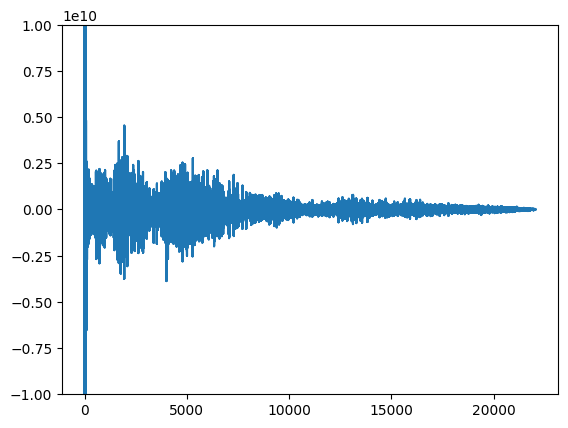

In [16]:
recordings_nr1 = 10

duration1 = 10
fs = 44100 #sampling rate

for i in range(recordings_nr1):
    raw = sd.rec(int(duration*fs/recordings_nr),samplerate = fs, channels = 1, dtype = "int32") #channel1 looks liek [[channel1]] while 
    #usually it looks like [[ch1][ch2]...]
    sd.wait()
    time_dom = raw[:,0]


    freq_dom = np.fft.fft(time_dom)
    freq_range = np.abs(np.fft.fftfreq(time_dom.shape[0], d = 1/fs))
    plt.clf()#clears the old plot
    plt.plot(freq_range, freq_dom)
    plt.ylim([-1e10,1e10])
    plt.xscale = ('log')
    plt.pause(0.001) #works correctly in real code (not ipynb)

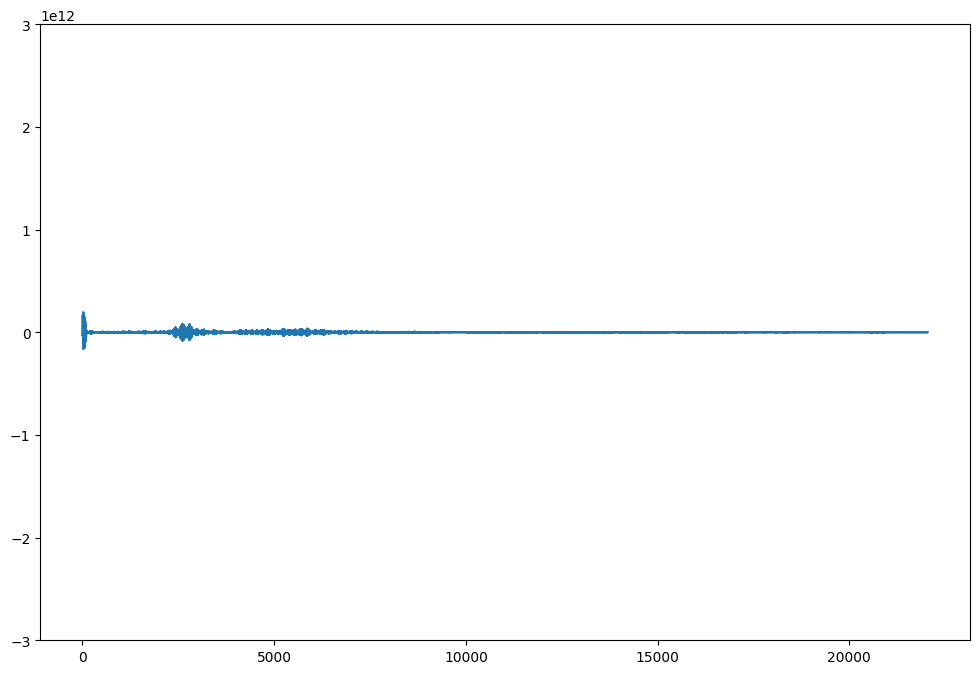

(8820,)
(50, 8820)


In [19]:
recordings_nr2 = 50

duration1 = 10
fs = 44100 #sampling rate

list_of_samples = []

for i in range(recordings_nr2):
    raw = sd.rec(int(duration1*fs/recordings_nr2),samplerate = fs, channels = 1, dtype = "int32") #channel1 looks liek [[channel1]] while 
    #usually it looks like [[ch1][ch2]...]
    sd.wait()
    time_dom = raw[:,0]


    freq_dom = np.fft.fft(time_dom)
    freq_range = np.abs(np.fft.fftfreq(time_dom.shape[0], d = 1/fs))

    clear_output(wait=True)
    plt.figure()
    plt.clf()
    plt.plot(freq_range, freq_dom)
    plt.ylim([-3e12, 3e12])
    #plt.xscale('log')
    plt.pause(0.001)
    print(time_dom.shape)
    # plt.clf()#clears the old plot
    # plt.plot(freq_range, freq_dom)
    # plt.ylim([-1e10,1e10])
    # plt.xscale = "log"
    # plt.pause(0.001) #works correctly in real code (not ipynb)
    list_of_samples.append(freq_dom)

freq_matrix = np.array(list_of_samples)
print(freq_matrix.shape)

(8820, 50)


C:\Users\Nikita\AppData\Local\Temp\ipykernel_17396\1298740172.py:7: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(X,Y,np.log(np.transpose(np.abs(freq_matrix.real))))


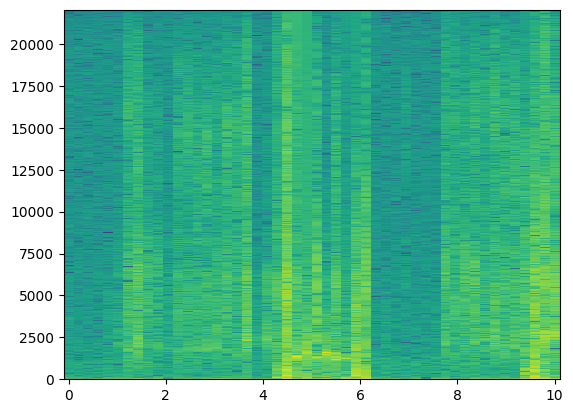

In [23]:
time_axis_data = np.linspace(0, duration1, recordings_nr2)
X, Y = np.meshgrid(time_axis_data, freq_range)

print(X.shape)
#print(Y[100:110, :])
plt.figure()
plt.pcolormesh(X,Y,np.log(np.transpose(np.abs(freq_matrix.real))))
plt.show()

The generated plot will be a heatmap of the recorded audio frequencies, with the X-axis representing time in seconds and the Y-axis representing frequency in Hz. The color intensity of each pixel in the heatmap represents the amplitude of the frequency component at that time and frequency

In [25]:
import scipy.signal as ss
from scipy.io import wavfile

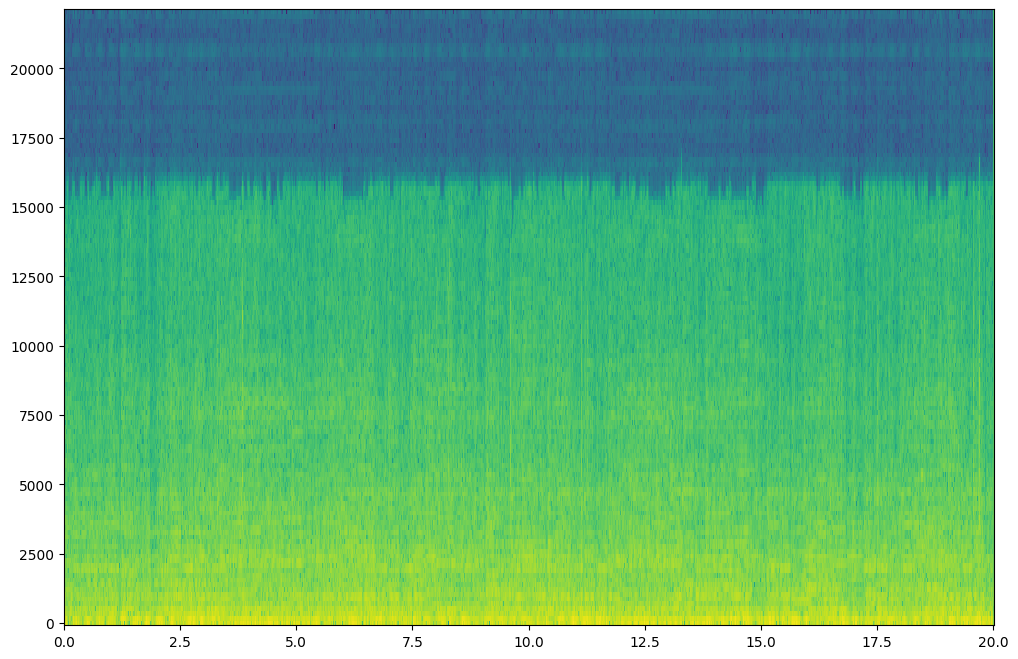

In [33]:
fs, raw = wavfile.read("Adele.wav")
time_dom = np.array(raw)

freq_range, time_axis_data, freq_matrix = ss.stft(time_dom,fs=fs)

X, Y = np.meshgrid(time_axis_data, freq_range)

plt.figure(figsize=(12,8))
plt.pcolormesh(X,Y,np.log(np.abs(freq_matrix)))
plt.show()

Both STFT and manually generated spectrograms produce a visual representation of the frequency content of a signal. However, STFT provides a more accurate representation of the time-varying frequency content of the signal. It uses overlapping windows to capture the changes in frequency over time so that's the reason. In contrast, the manually generated spectrogram provides a more rough estimate of the frequency content at each time point, but it's a simpler method that can be useful for quickly assessing the frequency content of a signal.